In [2]:
import sqlite3
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

con = sqlite3.connect("yelp.db")
reviews = pd.read_sql_query("SELECT * from reviews", con)
businesses = pd.read_sql_query("SELECT * from businesses", con)
subreviews=reviews[:5000]

In [3]:
reviews.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [4]:
reviews.shape

(31000, 10)

In [5]:
reviews.columns.values

array(['index', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date'], dtype=object)

In [6]:
subreviews['text']

0       Apparently Prides Osteria had a rough summer a...
1       This store is pretty good. Not as great as Wal...
2       I called WVM on the recommendation of a couple...
3       I've stayed at many Marriott and Renaissance M...
4       The food is always great here. The service fro...
                              ...                        
4995    I thought the pizza was pretty tasty but the m...
4996    The Isabella Stewart Gardner Museum is a rich ...
4997    Yum!\nWe tried both savory and sweet waffle co...
4998    Had an amazing birthday dinner here in October...
4999    I have shopped at this Target ever since my hu...
Name: text, Length: 5000, dtype: object

In [7]:
from nltk.corpus import stopwords # Import the stop word list
print (stopwords.words("english") )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    #review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [9]:
exampletext=subreviews['text'][0]
example=review_to_words(exampletext)
print(len(example))
print(example)

1227
apparently prides osteria rough summer evidenced almost empty dining room friday night however new blood kitchen seems revitalized food customers recent visits waitstaff warm unobtrusive pm left bar full dining room much lively perhaps beverly residents prefer later seating reading mixed reviews late little tentative choice luckily nothing worry food department started fried dough burrata prosciutto lovely although offer half portions pasta ordered entree size split chose tagliatelle bolognese four cheese filled pasta creamy sauce bacon asparagus grana frita good split secondi special berkshire pork secreto described pork skirt steak garlic potato pur e romanesco broccoli incorrectly described romanesco sauce tables received bread meal reason management also seems capable tenants apartment began playing basketball intervened also comped tables dessert ordered apple dumpling gelato also quite tasty portions huge particularly like prefer order courses someone orders meal may leave h

In [10]:
num_reviews = subreviews["text"].size
print(num_reviews)
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words(subreviews["text"][i] ) )
#clean_train_reviews

5000


In [11]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()


Creating the bag of words...



In [12]:
print(train_data_features)
np.sum(train_data_features[3])

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


27

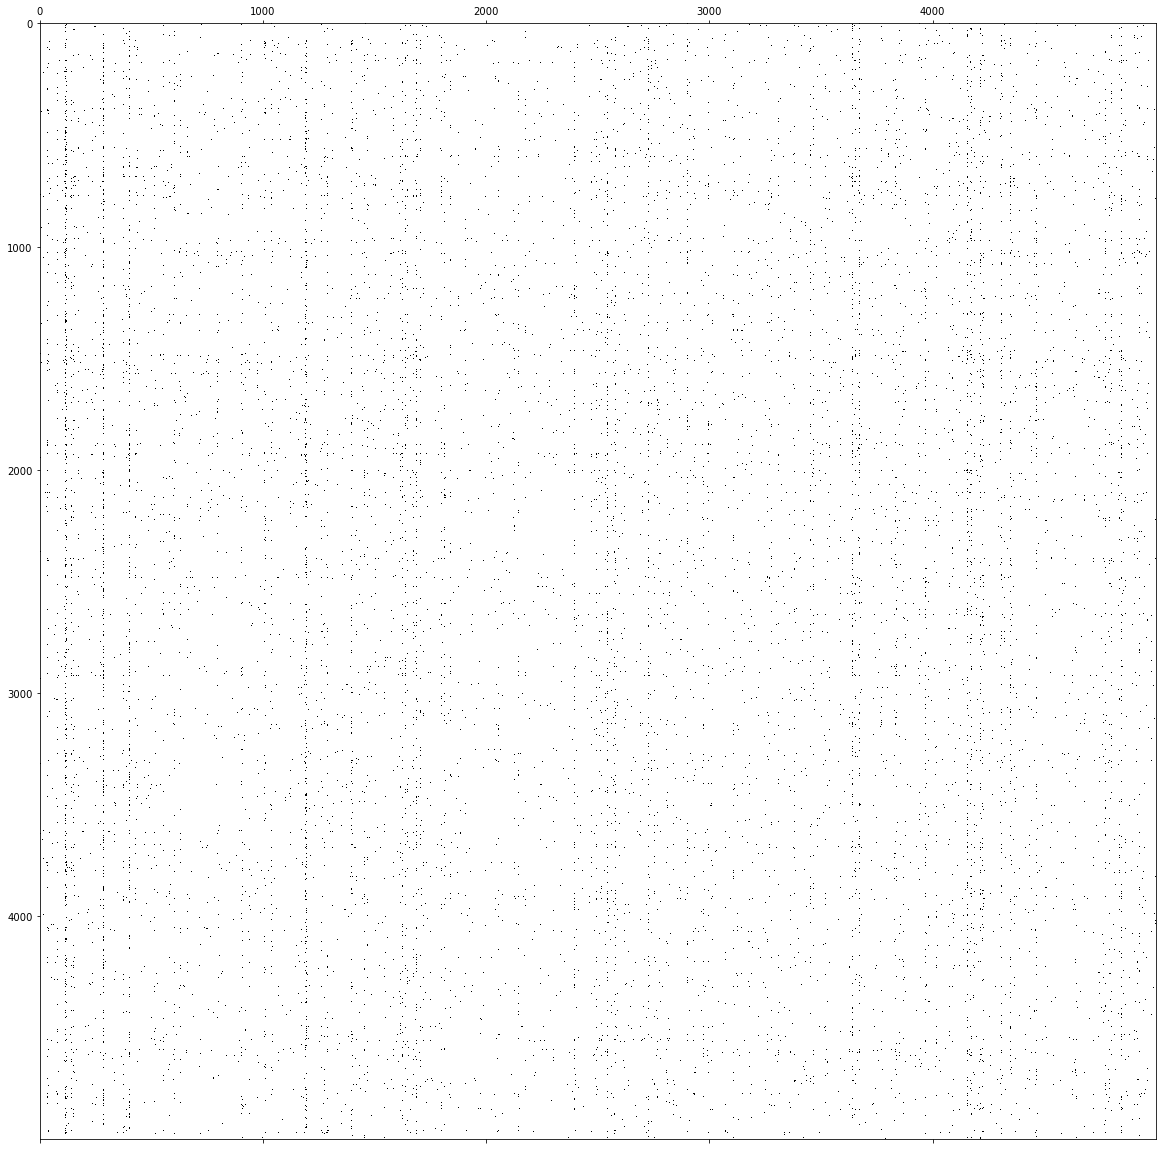

In [13]:
plt.figure(figsize=(20,50))
plt.spy(train_data_features)


earliest review: 2004-10-19 20:37:56
latest review: 2018-10-04 18:13:58
distribution of reviews per business:


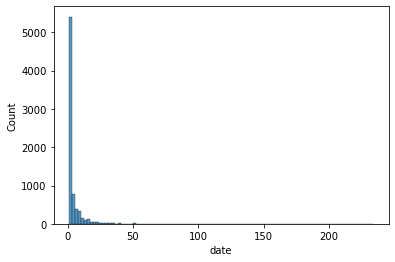

distribution of star ratings


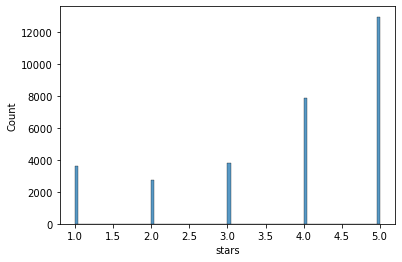

In [14]:
dff=reviews.groupby('business_id').count().sort_values(by='date',ascending=False)
#print(dff.head())
print('earliest review: {}'.format(reviews['date'].min()))
print('latest review: {}'.format(reviews['date'].max()))
print('distribution of reviews per business:')
sns.histplot(dff,x='date',bins=100)
plt.show()
print('distribution of star ratings')
sns.histplot(reviews,x='stars',bins=100)
plt.show()

         PC1       PC2  stars
0  14.193763 -6.130908      4
1  -1.202241  2.636077      4
2   0.850232  3.242665      5
3  -2.635225  1.890218      2
4  -4.380067  0.498345      4
5000


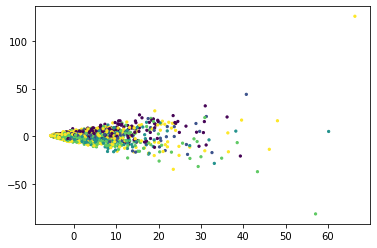

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def convert2PCs(X,y,n):
    pca = PCA(n)
    #indexes = X.index #SAVE LABELS
    labels = y.to_numpy()
    Xst = StandardScaler().fit_transform(X)
    principalComponents = pca.fit_transform(Xst)
    return principalComponents
    
PCs_train=convert2PCs(train_data_features,subreviews["stars"],2 )

PCdf_train = pd.DataFrame(data = PCs_train, columns = ['PC1','PC2'])
labels_train=reviews['stars'].copy()
PCdf_train['stars']=labels_train
print(PCdf_train.head())
print(len(PCdf_train))

plt.scatter(PCdf_train['PC1'],PCdf_train['PC2'],c=PCdf_train['stars'],s=5)
plt.show()


In [16]:
labels_train=reviews['stars'].copy()
labels_train


0        4
1        4
2        5
3        2
4        4
        ..
30995    1
30996    5
30997    5
30998    5
30999    4
Name: stars, Length: 31000, dtype: int64